In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

In [2]:
df = pd.read_csv('horse.csv')
imputer = Imputer()

In [3]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


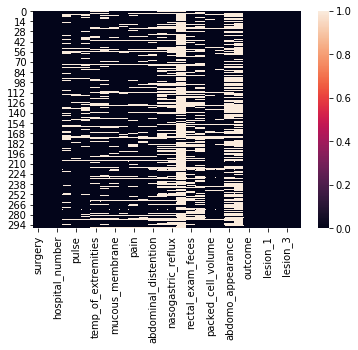

In [4]:
sns.heatmap(df.isnull())

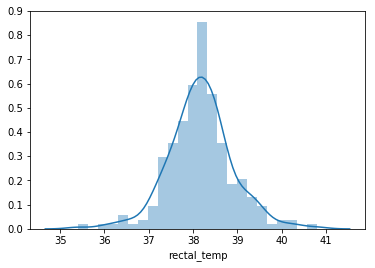

In [5]:
sns.distplot(df['rectal_temp'].dropna())
#close to normal distribution

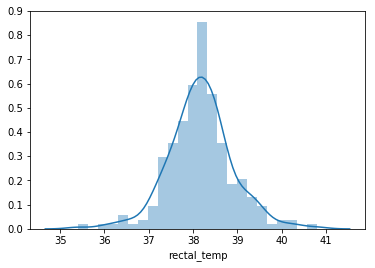

In [6]:
sns.distplot(df['rectal_temp'].dropna())

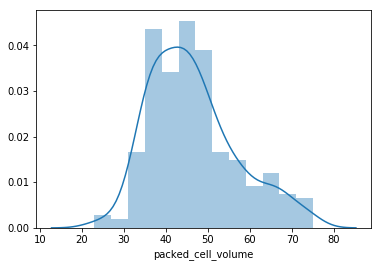

In [7]:
sns.distplot(df['packed_cell_volume'].dropna())

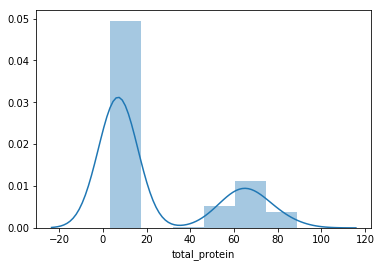

In [8]:
sns.distplot(df['total_protein'].dropna())

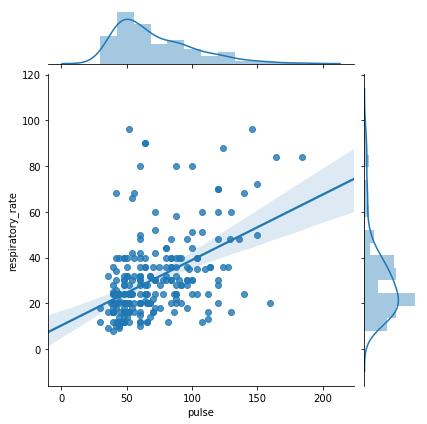

In [9]:
sns.jointplot(x='pulse',y='respiratory_rate',data = df,kind ='reg')

In [10]:
df.drop('hospital_number',axis = 1,inplace = True)

In [11]:
df.columns

Index(['surgery', 'age', 'rectal_temp', 'pulse', 'respiratory_rate',
       'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane',
       'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention',
       'nasogastric_tube', 'nasogastric_reflux', 'nasogastric_reflux_ph',
       'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein',
       'abdomo_appearance', 'abdomo_protein', 'outcome', 'surgical_lesion',
       'lesion_1', 'lesion_2', 'lesion_3', 'cp_data'],
      dtype='object')

In [12]:
df.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


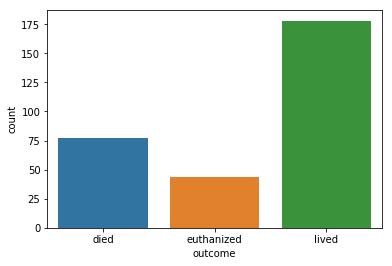

In [13]:
sns.countplot('outcome',data = df)

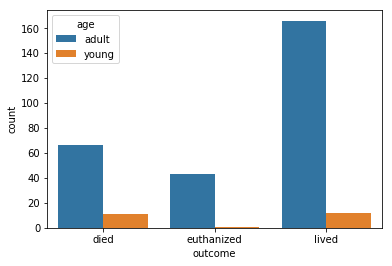

In [14]:
sns.countplot('outcome',hue = 'age',data = df)

In [15]:
df.columns

Index(['surgery', 'age', 'rectal_temp', 'pulse', 'respiratory_rate',
       'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane',
       'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention',
       'nasogastric_tube', 'nasogastric_reflux', 'nasogastric_reflux_ph',
       'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein',
       'abdomo_appearance', 'abdomo_protein', 'outcome', 'surgical_lesion',
       'lesion_1', 'lesion_2', 'lesion_3', 'cp_data'],
      dtype='object')

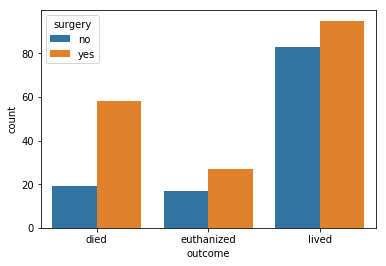

In [16]:
sns.countplot('outcome',hue = 'surgery',data = df)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 27 columns):
surgery                  299 non-null object
age                      299 non-null object
rectal_temp              239 non-null float64
pulse                    275 non-null float64
respiratory_rate         241 non-null float64
temp_of_extremities      243 non-null object
peripheral_pulse         230 non-null object
mucous_membrane          252 non-null object
capillary_refill_time    267 non-null object
pain                     244 non-null object
peristalsis              255 non-null object
abdominal_distention     243 non-null object
nasogastric_tube         195 non-null object
nasogastric_reflux       193 non-null object
nasogastric_reflux_ph    53 non-null float64
rectal_exam_feces        197 non-null object
abdomen                  181 non-null object
packed_cell_volume       270 non-null float64
total_protein            266 non-null float64
abdomo_appearance        134 non-nu

In [18]:
#changing categorical to numeric 
surgery = pd.get_dummies(df['surgery'],drop_first=True)

In [19]:
age = pd.get_dummies(df['age'],drop_first=True)

In [20]:
surgical_lesion = pd.get_dummies(df['surgical_lesion'],drop_first=True)

In [21]:
cp_data = pd.get_dummies(df['cp_data'],drop_first=True)

In [22]:
df.drop(['surgery','age','surgical_lesion','cp_data'],axis=1,inplace=True)

In [23]:
df = pd.concat([df,surgery,age,surgical_lesion,cp_data],axis=1)

In [24]:
df.head()

,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,...,abdomo_appearance,abdomo_protein,outcome,lesion_1,lesion_2,lesion_3,yes,young,yes,yes
0,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,...,NaN,NaN,died,11300,0,0,0,0,0,0
1,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,...,cloudy,2.0,euthanized,2208,0,0,1,0,0,0
2,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,...,NaN,NaN,lived,0,0,0,0,0,0,1
3,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,...,serosanguious,5.3,died,2208,0,0,1,1,1,1
4,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,...,NaN,NaN,died,4300,0,0,0,0,0,0


In [25]:
df.columns

Index(['rectal_temp', 'pulse', 'respiratory_rate', 'temp_of_extremities',
       'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain',
       'peristalsis', 'abdominal_distention', 'nasogastric_tube',
       'nasogastric_reflux', 'nasogastric_reflux_ph', 'rectal_exam_feces',
       'abdomen', 'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'lesion_1', 'lesion_2', 'lesion_3', 'yes',
       'young', 'yes', 'yes'],
      dtype='object')

In [26]:
df.columns=['rectal_temp', 'pulse', 'respiratory_rate', 'temp_of_extremities','peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain','peristalsis', 'abdominal_distention', 'nasogastric_tube','nasogastric_reflux', 'nasogastric_reflux_ph', 'rectal_exam_feces',
       'abdomen', 'packed_cell_volume', 'total_protein', 'abdomo_appearance','abdomo_protein', 'outcome', 'lesion_1', 'lesion_2', 'lesion_3', 'surgery','young', 'surgical_lesion', 'cp_data']

In [27]:
df.head()

,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,...,abdomo_appearance,abdomo_protein,outcome,lesion_1,lesion_2,lesion_3,surgery,young,surgical_lesion,cp_data
0,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,...,NaN,NaN,died,11300,0,0,0,0,0,0
1,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,...,cloudy,2.0,euthanized,2208,0,0,1,0,0,0
2,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,...,NaN,NaN,lived,0,0,0,0,0,0,1
3,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,...,serosanguious,5.3,died,2208,0,0,1,1,1,1
4,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,...,NaN,NaN,died,4300,0,0,0,0,0,0


In [28]:
df['rectal_temp'].mean()

38.168619246861923

In [29]:
df['rectal_temp'] = imputer.fit_transform(df[['rectal_temp']])

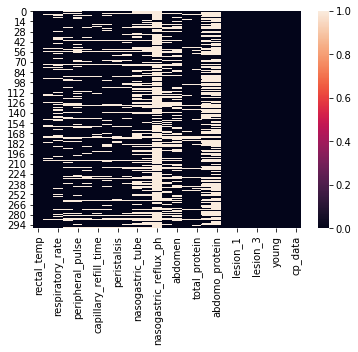

In [30]:
sns.heatmap(df.isnull())
#The heat map shows that there are no missing values in 'rectal_temp'

In [31]:
df['respiratory_rate'].mean()

30.460580912863069

In [32]:
df['respiratory_rate'] = imputer.fit_transform(df[['respiratory_rate']])


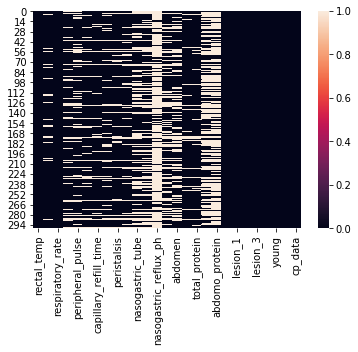

In [33]:
sns.heatmap(df.isnull())

In [34]:
df['pulse'].mean()


72.0

In [35]:
df['pulse'] = imputer.fit_transform(df[['pulse']])


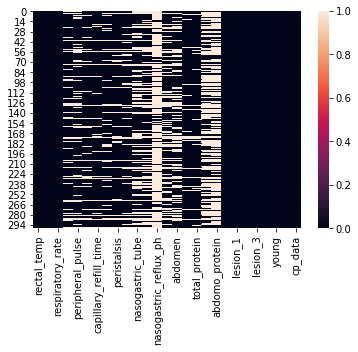

In [36]:
sns.heatmap(df.isnull())

In [37]:
df.head(10)

,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,...,abdomo_appearance,abdomo_protein,outcome,lesion_1,lesion_2,lesion_3,surgery,young,surgical_lesion,cp_data
0,38.500000,66.0,28.000000,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,...,NaN,NaN,died,11300,0,0,0,0,0,0
1,39.200000,88.0,20.000000,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,...,cloudy,2.0,euthanized,2208,0,0,1,0,0,0
2,38.300000,40.0,24.000000,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,...,NaN,NaN,lived,0,0,0,0,0,0,1
3,39.100000,164.0,84.000000,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,...,serosanguious,5.3,died,2208,0,0,1,1,1,1
4,37.300000,104.0,35.000000,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,...,NaN,NaN,died,4300,0,0,0,0,0,0
5,38.168619,72.0,30.460581,warm,normal,pale_pink,less_3_sec,depressed,hypomotile,slight,...,NaN,NaN,lived,0,0,0,0,0,0,0
6,37.900000,48.0,16.000000,normal,normal,normal_pink,less_3_sec,mild_pain,hypomotile,moderate,...,NaN,NaN,lived,3124,0,0,1,0,1,0
7,38.168619,60.0,30.460581,cool,NaN,NaN,less_3_sec,NaN,absent,slight,...,NaN,NaN,died,2208,0,0,1,0,1,0
8,38.168619,80.0,36.000000,cool,absent,pale_pink,less_3_sec,severe_pain,absent,severe,...,NaN,NaN,euthanized,3205,0,0,0,0,1,0
9,38.300000,90.0,30.460581,normal,NaN,normal_pink,less_3_sec,extreme_pain,hypomotile,none,...,clear,2.2,lived,0,0,0,0,1,0,1


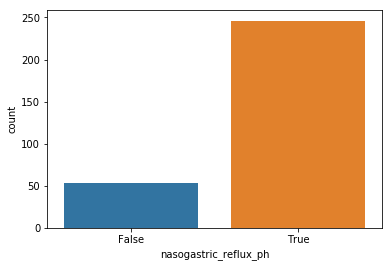

In [38]:
sns.countplot(df['nasogastric_reflux_ph'].isnull())

In [39]:
df.drop('nasogastric_reflux_ph',inplace=True,axis = 1)
#deleted 'nasogastric_reflux_ph' due to a lot of nan values

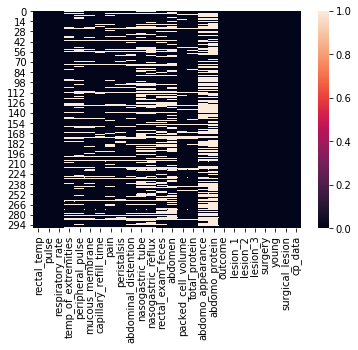

In [40]:
sns.heatmap(df.isnull())

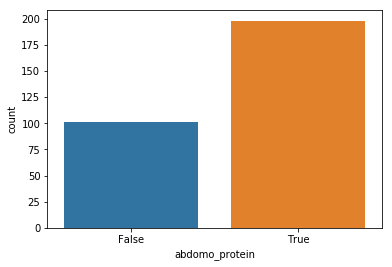

In [41]:
sns.countplot(df['abdomo_protein'].isnull())

In [42]:
df.drop('abdomo_protein',inplace=True,axis = 1)
#deleted abdomo_protein cause of lack of values

In [43]:
df.head()

,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,...,total_protein,abdomo_appearance,outcome,lesion_1,lesion_2,lesion_3,surgery,young,surgical_lesion,cp_data
0,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,...,8.4,NaN,died,11300,0,0,0,0,0,0
1,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,...,85.0,cloudy,euthanized,2208,0,0,1,0,0,0
2,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,...,6.7,NaN,lived,0,0,0,0,0,0,1
3,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,...,7.2,serosanguious,died,2208,0,0,1,1,1,1
4,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,...,7.4,NaN,died,4300,0,0,0,0,0,0


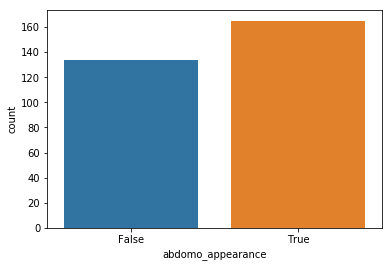

In [44]:
sns.countplot(df['abdomo_appearance'].isnull())

In [45]:
df.drop('abdomo_appearance',inplace=True,axis = 1)

In [46]:
df.head(10)

,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,...,packed_cell_volume,total_protein,outcome,lesion_1,lesion_2,lesion_3,surgery,young,surgical_lesion,cp_data
0,38.500000,66.0,28.000000,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,...,45.0,8.4,died,11300,0,0,0,0,0,0
1,39.200000,88.0,20.000000,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,...,50.0,85.0,euthanized,2208,0,0,1,0,0,0
2,38.300000,40.0,24.000000,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,...,33.0,6.7,lived,0,0,0,0,0,0,1
3,39.100000,164.0,84.000000,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,...,48.0,7.2,died,2208,0,0,1,1,1,1
4,37.300000,104.0,35.000000,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,...,74.0,7.4,died,4300,0,0,0,0,0,0
5,38.168619,72.0,30.460581,warm,normal,pale_pink,less_3_sec,depressed,hypomotile,slight,...,NaN,NaN,lived,0,0,0,0,0,0,0
6,37.900000,48.0,16.000000,normal,normal,normal_pink,less_3_sec,mild_pain,hypomotile,moderate,...,37.0,7.0,lived,3124,0,0,1,0,1,0
7,38.168619,60.0,30.460581,cool,NaN,NaN,less_3_sec,NaN,absent,slight,...,44.0,8.3,died,2208,0,0,1,0,1,0
8,38.168619,80.0,36.000000,cool,absent,pale_pink,less_3_sec,severe_pain,absent,severe,...,38.0,6.2,euthanized,3205,0,0,0,0,1,0
9,38.300000,90.0,30.460581,normal,NaN,normal_pink,less_3_sec,extreme_pain,hypomotile,none,...,40.0,6.2,lived,0,0,0,0,1,0,1


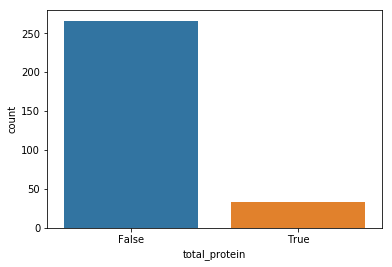

In [47]:
sns.countplot(df['total_protein'].isnull())

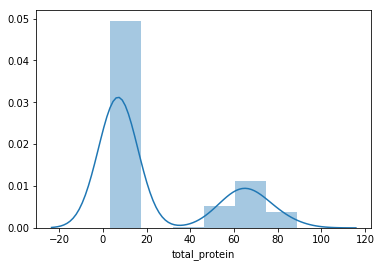

In [48]:
#impute values for total_protein
sns.distplot(df['total_protein'].dropna())
#not normally distributed

In [49]:
df['total_protein'].mean()

24.274436090225564

In [50]:
df['total_protein'] = imputer.fit_transform(df[['total_protein']])

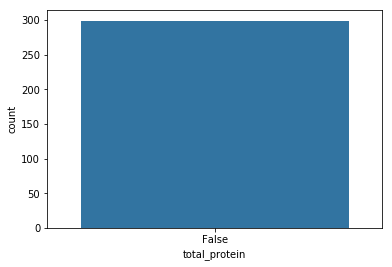

In [51]:
sns.countplot(df['total_protein'].isnull())

In [52]:
df['packed_cell_volume'].mean()

46.30740740740741

In [53]:
df['packed_cell_volume'] = imputer.fit_transform(df[['packed_cell_volume']])

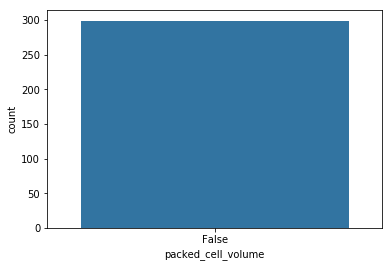

In [54]:
sns.countplot(df['packed_cell_volume'].isnull())

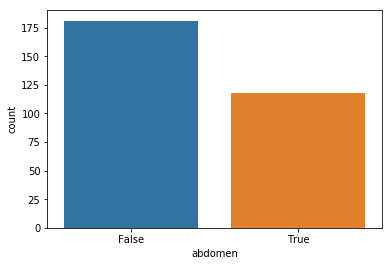

In [55]:
sns.countplot(df['abdomen'].isnull())

In [56]:
def impute_abd(cols):
    abd = cols[0]
   
    
    if pd.isnull(abd):
        return "<UNK>"

    else:
        return abd

In [57]:
df['abdomen'] = df[['abdomen']].apply(impute_abd,axis=1)

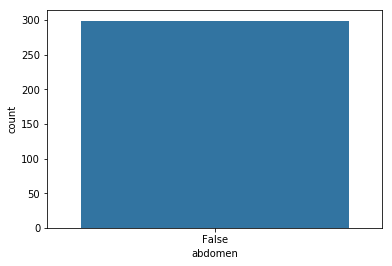

In [58]:
sns.countplot(df['abdomen'].isnull())

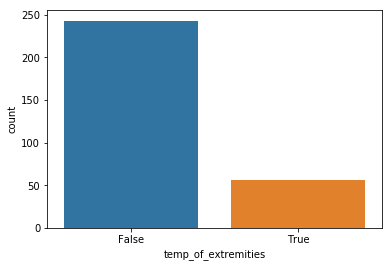

In [59]:
sns.countplot(df['temp_of_extremities'].isnull())


In [60]:
df['temp_of_extremities'].unique()
# 5 different values for temp_of_extremities - cold,cool,normal,warm,nan

array(['cool', nan, 'normal', 'cold', 'warm'], dtype=object)

In [61]:
def impute_toe(cols):
    temp_of_extremities = cols[0]
   
    
    if pd.isnull(temp_of_extremities):
        return "<UNK>"

    else:
        return temp_of_extremities

In [62]:
df['temp_of_extremities'] = df[['temp_of_extremities']].apply(impute_toe,axis=1)

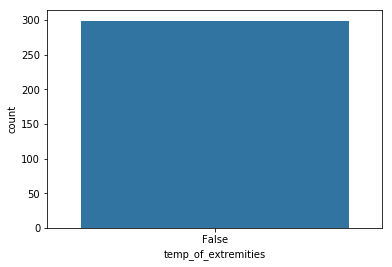

In [63]:
sns.countplot(df['temp_of_extremities'].isnull())

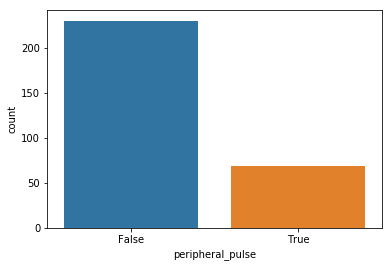

In [64]:
sns.countplot(df['peripheral_pulse'].isnull())


In [65]:
df['peripheral_pulse'].unique()

array(['reduced', nan, 'normal', 'absent', 'increased'], dtype=object)

In [66]:
def impute_pp(cols):
    peripheral_pulse = cols[0]
   
    
    if pd.isnull(peripheral_pulse):
        return "<UNK>"

    else:
        return peripheral_pulse

In [67]:
df['peripheral_pulse'] = df[['peripheral_pulse']].apply(impute_pp,axis=1)

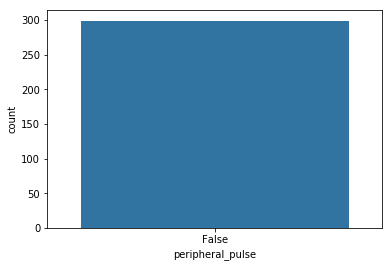

In [68]:
sns.countplot(df['peripheral_pulse'].isnull())



In [69]:
df['mucous_membrane'].unique()

array([nan, 'pale_cyanotic', 'pale_pink', 'dark_cyanotic', 'normal_pink',
       'bright_red', 'bright_pink'], dtype=object)

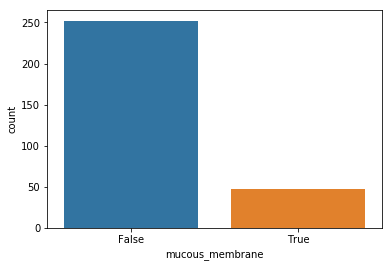

In [70]:
sns.countplot(df['mucous_membrane'].isnull())

In [71]:
def impute_mm(cols):
    mucous_membrane = cols[0]
   
    
    if pd.isnull(mucous_membrane):
        return "<UNK>"

    else:
        return mucous_membrane

In [72]:
df['mucous_membrane'] = df[['mucous_membrane']].apply(impute_mm,axis=1)

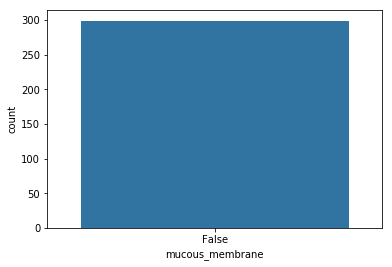

In [73]:
sns.countplot(df['mucous_membrane'].isnull())

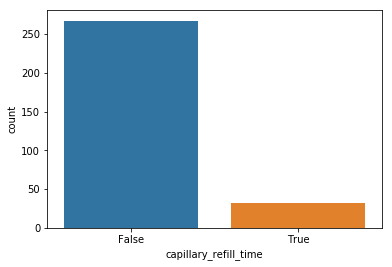

In [74]:
sns.countplot(df['capillary_refill_time'].isnull())

In [75]:
df['capillary_refill_time'].unique()

array(['more_3_sec', 'less_3_sec', nan, '3'], dtype=object)

In [76]:
def impute_crt(cols):
    crt = cols[0]
   
    
    if pd.isnull(crt):
        return "<UNK>"

    else:
        return crt

In [77]:
df['capillary_refill_time'] = df[['capillary_refill_time']].apply(impute_crt,axis=1)

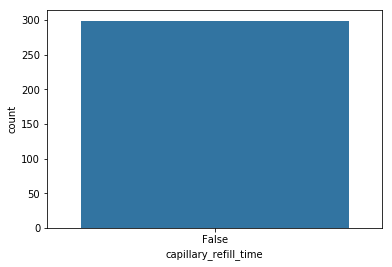

In [78]:
sns.countplot(df['capillary_refill_time'].isnull())

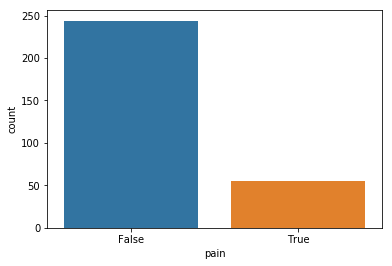

In [79]:
sns.countplot(df['pain'].isnull())

In [80]:
df['pain'].unique()

array(['extreme_pain', 'mild_pain', 'depressed', nan, 'severe_pain',
       'alert'], dtype=object)

In [81]:
def impute_pain(cols):
    pain = cols[0]
   
    
    if pd.isnull(pain):
        return "<UNK>"

    else:
        return pain

In [82]:
df['pain'] = df[['pain']].apply(impute_pain,axis=1)

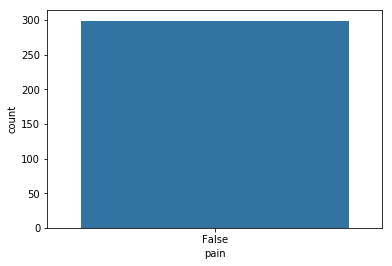

In [83]:
sns.countplot(df['pain'].isnull())

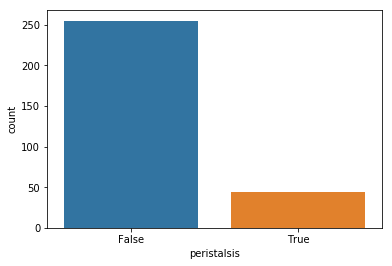

In [84]:
sns.countplot(df['peristalsis'].isnull())

In [85]:
df['peristalsis'].unique()

array(['absent', 'hypomotile', nan, 'hypermotile', 'normal'], dtype=object)

In [86]:
def impute_peristalsis(cols):
    peristalsis = cols[0]
   
    
    if pd.isnull(peristalsis):
        return "<UNK>"

    else:
        return peristalsis

In [87]:
df['peristalsis'] = df[['peristalsis']].apply(impute_peristalsis,axis=1)

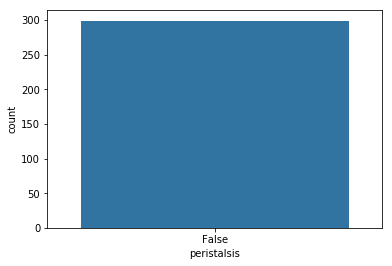

In [88]:
sns.countplot(df['peristalsis'].isnull())

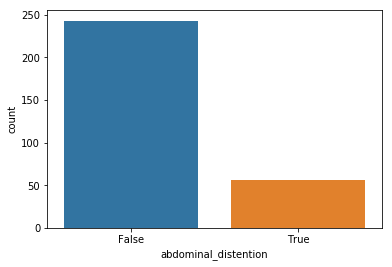

In [89]:
sns.countplot(df['abdominal_distention'].isnull())

In [90]:
df['abdominal_distention'].unique()

array(['severe', 'slight', 'none', nan, 'moderate'], dtype=object)

In [91]:
def impute_abddist(cols):
    abddist = cols[0]
   
    
    if pd.isnull(abddist):
        return "<UNK>"

    else:
        return abddist

In [92]:
df['abdominal_distention'] = df[['abdominal_distention']].apply(impute_abddist,axis=1)

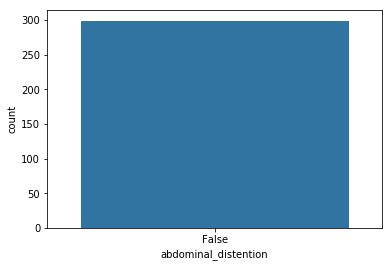

In [93]:
sns.countplot(df['abdominal_distention'].isnull())


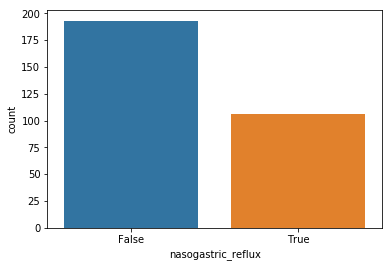

In [94]:
sns.countplot(df['nasogastric_reflux'].isnull())

In [95]:
df['nasogastric_reflux'].unique()

array([nan, 'less_1_liter', 'none', 'more_1_liter'], dtype=object)

In [96]:
def impute_nsref(cols):
    nsref = cols[0]
   
    
    if pd.isnull(nsref):
        return "<UNK>"

    else:
        return nsref

In [97]:
df['nasogastric_reflux'] = df[['nasogastric_reflux']].apply(impute_nsref,axis=1)

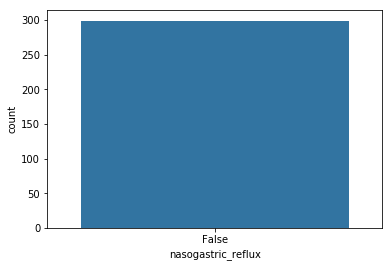

In [98]:
sns.countplot(df['nasogastric_reflux'].isnull())

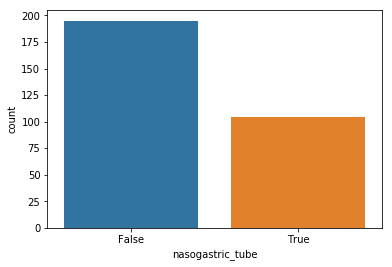

In [99]:
sns.countplot(df['nasogastric_tube'].isnull())

In [100]:
df['nasogastric_tube'].unique()

array([nan, 'none', 'slight', 'significant'], dtype=object)

In [101]:
def impute_nstub(cols):
    nstub = cols[0]
   
    
    if pd.isnull(nstub):
        return "<UNK>"

    else:
        return nstub

In [102]:
df['nasogastric_tube'] = df[['nasogastric_tube']].apply(impute_nstub,axis=1)

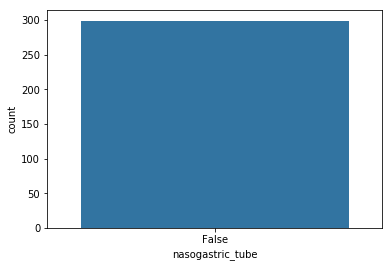

In [103]:
sns.countplot(df['nasogastric_tube'].isnull())

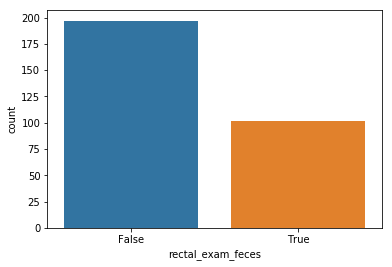

In [104]:
sns.countplot(df['rectal_exam_feces'].isnull())

In [105]:
df['rectal_exam_feces'].unique()

array(['decreased', 'absent', 'normal', nan, 'increased'], dtype=object)

In [106]:
def impute_recex(cols):
    recex = cols[0]
   
    
    if pd.isnull(recex):
        return "<UNK>"

    else:
        return recex

In [107]:
df['rectal_exam_feces'] = df[['rectal_exam_feces']].apply(impute_recex,axis=1)

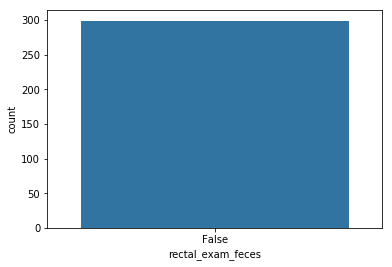

In [108]:
sns.countplot(df['rectal_exam_feces'].isnull())

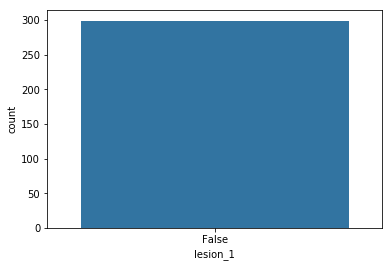

In [109]:
sns.countplot(df['lesion_1'].isnull())

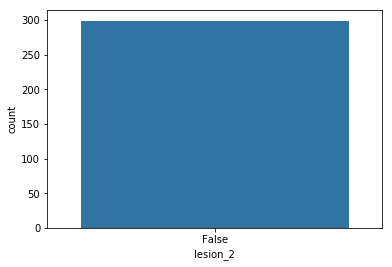

In [110]:
sns.countplot(df['lesion_2'].isnull())

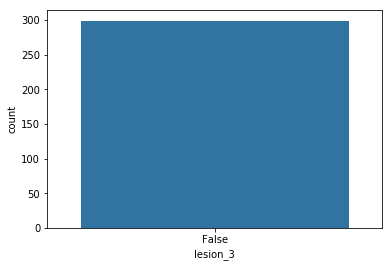

In [111]:
sns.countplot(df['lesion_3'].isnull())

In [112]:
df.columns

Index(['rectal_temp', 'pulse', 'respiratory_rate', 'temp_of_extremities',
       'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain',
       'peristalsis', 'abdominal_distention', 'nasogastric_tube',
       'nasogastric_reflux', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'outcome', 'lesion_1',
       'lesion_2', 'lesion_3', 'surgery', 'young', 'surgical_lesion',
       'cp_data'],
      dtype='object')

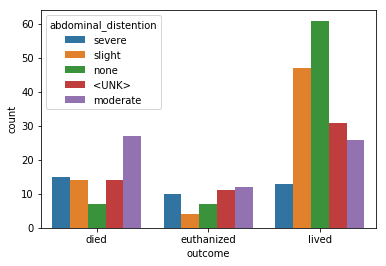

In [113]:
sns.countplot(x='outcome',hue = 'abdominal_distention',data = df)
#shows that majority of the hourses that lived had no abdomial distention

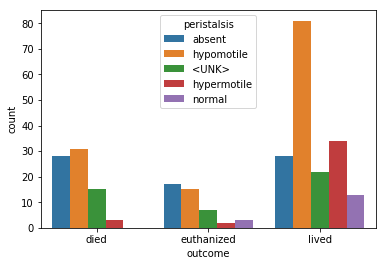

In [114]:
sns.countplot(x='outcome',hue = 'peristalsis',data = df)
#shows that majority of the hourses that lived had hypomotile peristalsis

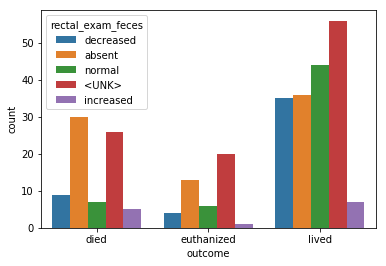

In [115]:
sns.countplot(x='outcome',hue = 'rectal_exam_feces',data = df)


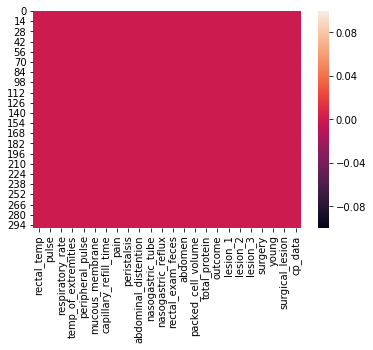

In [116]:
sns.heatmap(df.isnull())
#shows that there are no nan values

In [117]:
df.columns

Index(['rectal_temp', 'pulse', 'respiratory_rate', 'temp_of_extremities',
       'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain',
       'peristalsis', 'abdominal_distention', 'nasogastric_tube',
       'nasogastric_reflux', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'outcome', 'lesion_1',
       'lesion_2', 'lesion_3', 'surgery', 'young', 'surgical_lesion',
       'cp_data'],
      dtype='object')

In [118]:
df.head()

,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,...,packed_cell_volume,total_protein,outcome,lesion_1,lesion_2,lesion_3,surgery,young,surgical_lesion,cp_data
0,38.5,66.0,28.0,cool,reduced,<UNK>,more_3_sec,extreme_pain,absent,severe,...,45.0,8.4,died,11300,0,0,0,0,0,0
1,39.2,88.0,20.0,<UNK>,<UNK>,pale_cyanotic,less_3_sec,mild_pain,absent,slight,...,50.0,85.0,euthanized,2208,0,0,1,0,0,0
2,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,...,33.0,6.7,lived,0,0,0,0,0,0,1
3,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,...,48.0,7.2,died,2208,0,0,1,1,1,1
4,37.3,104.0,35.0,<UNK>,<UNK>,dark_cyanotic,more_3_sec,<UNK>,<UNK>,<UNK>,...,74.0,7.4,died,4300,0,0,0,0,0,0


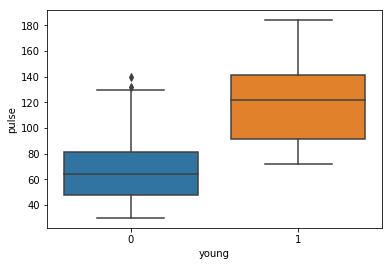

In [119]:
sns.boxplot(x='young',y='pulse',data = df)
#younger horses have a higher pulse. 

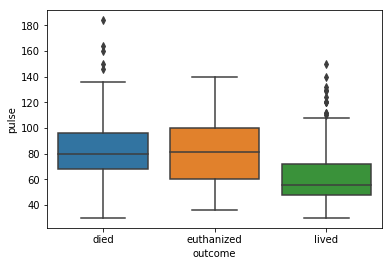

In [120]:
sns.boxplot(x='outcome',y='pulse',data = df)

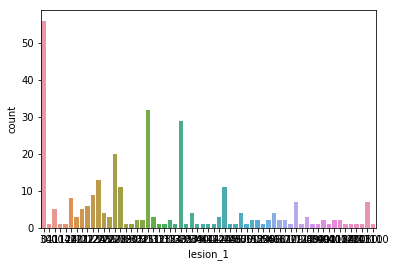

In [121]:
sns.countplot(x='lesion_1',data = df)

In [122]:
df['lesion_1'].unique()

array([11300,  2208,     0,  4300,  3124,  3205,  2124,  2111,  4124,
        2112,  3207,  1400,  4205,  3111,  4122,  2207,  2209,  1124,
        7111,  5205,  2113,  9400,  2305,  7209,  7400,  3112,  3209,
        2322, 11124,  3025,  2205,  5206,   400,  5000,  5400, 31110,
        2206,  5124,  7113,  6209,  3400,  6112,  6111,  1111,  2300,
       21110,  4111,  3133,  5111,   300,  3115,  9000,  3300,  3113,
       41110, 11400, 12208,  4206,  4207,  8300,  8400])

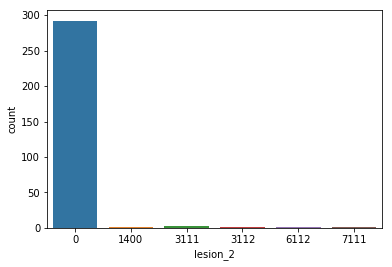

In [123]:
sns.countplot(x='lesion_2',data = df)

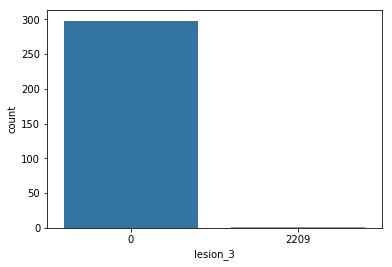

In [124]:
sns.countplot(x='lesion_3',data = df)

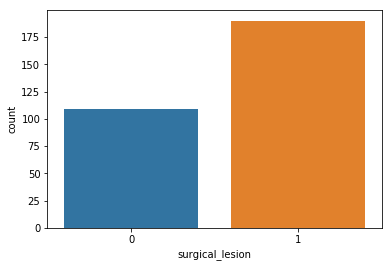

In [125]:
sns.countplot(x='surgical_lesion',data = df)

In [126]:
## so far, an extensive eda has been performed , and missing values have been imputed for numerical data.
##now, coming to categorical a token <UNK> has been assigned. 

In [127]:
df.head(20)

,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,...,packed_cell_volume,total_protein,outcome,lesion_1,lesion_2,lesion_3,surgery,young,surgical_lesion,cp_data
0,38.500000,66.0,28.000000,cool,reduced,<UNK>,more_3_sec,extreme_pain,absent,severe,...,45.000000,8.400000,died,11300,0,0,0,0,0,0
1,39.200000,88.0,20.000000,<UNK>,<UNK>,pale_cyanotic,less_3_sec,mild_pain,absent,slight,...,50.000000,85.000000,euthanized,2208,0,0,1,0,0,0
2,38.300000,40.0,24.000000,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,...,33.000000,6.700000,lived,0,0,0,0,0,0,1
3,39.100000,164.0,84.000000,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,...,48.000000,7.200000,died,2208,0,0,1,1,1,1
4,37.300000,104.0,35.000000,<UNK>,<UNK>,dark_cyanotic,more_3_sec,<UNK>,<UNK>,<UNK>,...,74.000000,7.400000,died,4300,0,0,0,0,0,0
5,38.168619,72.0,30.460581,warm,normal,pale_pink,less_3_sec,depressed,hypomotile,slight,...,46.307407,24.274436,lived,0,0,0,0,0,0,0
6,37.900000,48.0,16.000000,normal,normal,normal_pink,less_3_sec,mild_pain,hypomotile,moderate,...,37.000000,7.000000,lived,3124,0,0,1,0,1,0
7,38.168619,60.0,30.460581,cool,<UNK>,<UNK>,less_3_sec,<UNK>,absent,slight,...,44.000000,8.300000,died,2208,0,0,1,0,1,0
8,38.168619,80.0,36.000000,cool,absent,pale_pink,less_3_sec,severe_pain,absent,severe,...,38.000000,6.200000,euthanized,3205,0,0,0,0,1,0
9,38.300000,90.0,30.460581,normal,<UNK>,normal_pink,less_3_sec,extreme_pain,hypomotile,none,...,40.000000,6.200000,lived,0,0,0,0,1,0,1


In [128]:
df_copy = df.copy()
df_copy_2 = df.copy()


In [129]:
df_copy_2.head()#will use to concat

,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,...,packed_cell_volume,total_protein,outcome,lesion_1,lesion_2,lesion_3,surgery,young,surgical_lesion,cp_data
0,38.5,66.0,28.0,cool,reduced,<UNK>,more_3_sec,extreme_pain,absent,severe,...,45.0,8.4,died,11300,0,0,0,0,0,0
1,39.2,88.0,20.0,<UNK>,<UNK>,pale_cyanotic,less_3_sec,mild_pain,absent,slight,...,50.0,85.0,euthanized,2208,0,0,1,0,0,0
2,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,...,33.0,6.7,lived,0,0,0,0,0,0,1
3,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,...,48.0,7.2,died,2208,0,0,1,1,1,1
4,37.3,104.0,35.0,<UNK>,<UNK>,dark_cyanotic,more_3_sec,<UNK>,<UNK>,<UNK>,...,74.0,7.4,died,4300,0,0,0,0,0,0


In [130]:
df_copy_2.drop(['temp_of_extremities','peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain','peristalsis', 'abdominal_distention', 'nasogastric_tube',
       'nasogastric_reflux', 'rectal_exam_feces', 'abdomen','outcome'],axis=1,inplace=True)

In [131]:
df_copy_2.head() #only numeric values

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,lesion_1,lesion_2,lesion_3,surgery,young,surgical_lesion,cp_data
0,38.5,66.0,28.0,45.0,8.4,11300,0,0,0,0,0,0
1,39.2,88.0,20.0,50.0,85.0,2208,0,0,1,0,0,0
2,38.3,40.0,24.0,33.0,6.7,0,0,0,0,0,0,1
3,39.1,164.0,84.0,48.0,7.2,2208,0,0,1,1,1,1
4,37.3,104.0,35.0,74.0,7.4,4300,0,0,0,0,0,0


In [132]:
#using df_copy
cat_df_copy = df_copy.select_dtypes(include=['object'])

In [133]:
cat_df_copy.head()

,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,outcome
0,cool,reduced,<UNK>,more_3_sec,extreme_pain,absent,severe,<UNK>,<UNK>,decreased,distend_large,died
1,<UNK>,<UNK>,pale_cyanotic,less_3_sec,mild_pain,absent,slight,<UNK>,<UNK>,absent,other,euthanized
2,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,<UNK>,<UNK>,normal,normal,lived
3,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,<UNK>,died
4,<UNK>,<UNK>,dark_cyanotic,more_3_sec,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,died


In [134]:

cat_df_copy = pd.get_dummies(cat_df_copy, columns=['temp_of_extremities'], prefix = ['toe'])

cat_df_copy.head()

,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,outcome,toe_<UNK>,toe_cold,toe_cool,toe_normal,toe_warm
0,reduced,<UNK>,more_3_sec,extreme_pain,absent,severe,<UNK>,<UNK>,decreased,distend_large,died,0,0,1,0,0
1,<UNK>,pale_cyanotic,less_3_sec,mild_pain,absent,slight,<UNK>,<UNK>,absent,other,euthanized,1,0,0,0,0
2,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,<UNK>,<UNK>,normal,normal,lived,0,0,0,1,0
3,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,<UNK>,died,0,1,0,0,0
4,<UNK>,dark_cyanotic,more_3_sec,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,died,1,0,0,0,0


In [135]:

cat_df_copy = pd.get_dummies(cat_df_copy, columns=['peripheral_pulse'], prefix = ['pp'])

cat_df_copy.head()

,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,outcome,toe_<UNK>,toe_cold,toe_cool,toe_normal,toe_warm,pp_<UNK>,pp_absent,pp_increased,pp_normal,pp_reduced
0,<UNK>,more_3_sec,extreme_pain,absent,severe,<UNK>,<UNK>,decreased,distend_large,died,0,0,1,0,0,0,0,0,0,1
1,pale_cyanotic,less_3_sec,mild_pain,absent,slight,<UNK>,<UNK>,absent,other,euthanized,1,0,0,0,0,1,0,0,0,0
2,pale_pink,less_3_sec,mild_pain,hypomotile,none,<UNK>,<UNK>,normal,normal,lived,0,0,0,1,0,0,0,0,1,0
3,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,<UNK>,died,0,1,0,0,0,0,0,0,1,0
4,dark_cyanotic,more_3_sec,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,died,1,0,0,0,0,1,0,0,0,0


In [136]:

cat_df_copy = pd.get_dummies(cat_df_copy, columns=['mucous_membrane'], prefix = ['mm'])



In [137]:

cat_df_copy = pd.get_dummies(cat_df_copy, columns=['capillary_refill_time'], prefix = ['crt'])



In [138]:

cat_df_copy = pd.get_dummies(cat_df_copy, columns=['pain'], prefix = ['pain'])

cat_df_copy.head()

,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,outcome,toe_<UNK>,toe_cold,toe_cool,...,crt_3,crt_<UNK>,crt_less_3_sec,crt_more_3_sec,pain_<UNK>,pain_alert,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_severe_pain
0,absent,severe,<UNK>,<UNK>,decreased,distend_large,died,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,absent,slight,<UNK>,<UNK>,absent,other,euthanized,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,hypomotile,none,<UNK>,<UNK>,normal,normal,lived,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,absent,severe,none,less_1_liter,decreased,<UNK>,died,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,<UNK>,died,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [139]:

cat_df_copy = pd.get_dummies(cat_df_copy, columns=['peristalsis'], prefix = ['peristalsis'])



In [140]:

cat_df_copy = pd.get_dummies(cat_df_copy, columns=['abdominal_distention'], prefix = ['ad'])



In [141]:

cat_df_copy = pd.get_dummies(cat_df_copy, columns=['nasogastric_tube'], prefix = ['nt'])



In [142]:

cat_df_copy = pd.get_dummies(cat_df_copy, columns=['nasogastric_reflux'], prefix = ['nf'])



In [143]:

cat_df_copy = pd.get_dummies(cat_df_copy, columns=['rectal_exam_feces'], prefix = ['ref'])



In [144]:

cat_df_copy = pd.get_dummies(cat_df_copy, columns=['abdomen'], prefix = ['abd'])



In [145]:
le = LabelEncoder()
le.fit(["died","euthanized","lived"])
cat_df_copy['outcome'] = le.transform(cat_df_copy['outcome'])

In [146]:
cat_df_copy.head(4)

,outcome,toe_<UNK>,toe_cold,toe_cool,toe_normal,toe_warm,pp_<UNK>,pp_absent,pp_increased,pp_normal,...,ref_absent,ref_decreased,ref_increased,ref_normal,abd_<UNK>,abd_distend_large,abd_distend_small,abd_firm,abd_normal,abd_other
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,2,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0


In [147]:
df_copy_2.head() ## all values are in the form of numbers and vectors.

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,lesion_1,lesion_2,lesion_3,surgery,young,surgical_lesion,cp_data
0,38.5,66.0,28.0,45.0,8.4,11300,0,0,0,0,0,0
1,39.2,88.0,20.0,50.0,85.0,2208,0,0,1,0,0,0
2,38.3,40.0,24.0,33.0,6.7,0,0,0,0,0,0,1
3,39.1,164.0,84.0,48.0,7.2,2208,0,0,1,1,1,1
4,37.3,104.0,35.0,74.0,7.4,4300,0,0,0,0,0,0


In [148]:
cat_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 57 columns):
outcome                    299 non-null int64
toe_<UNK>                  299 non-null uint8
toe_cold                   299 non-null uint8
toe_cool                   299 non-null uint8
toe_normal                 299 non-null uint8
toe_warm                   299 non-null uint8
pp_<UNK>                   299 non-null uint8
pp_absent                  299 non-null uint8
pp_increased               299 non-null uint8
pp_normal                  299 non-null uint8
pp_reduced                 299 non-null uint8
mm_<UNK>                   299 non-null uint8
mm_bright_pink             299 non-null uint8
mm_bright_red              299 non-null uint8
mm_dark_cyanotic           299 non-null uint8
mm_normal_pink             299 non-null uint8
mm_pale_cyanotic           299 non-null uint8
mm_pale_pink               299 non-null uint8
crt_3                      299 non-null uint8
crt_<UNK>            

In [149]:
df_copy_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
rectal_temp           299 non-null float64
pulse                 299 non-null float64
respiratory_rate      299 non-null float64
packed_cell_volume    299 non-null float64
total_protein         299 non-null float64
lesion_1              299 non-null int64
lesion_2              299 non-null int64
lesion_3              299 non-null int64
surgery               299 non-null uint8
young                 299 non-null uint8
surgical_lesion       299 non-null uint8
cp_data               299 non-null uint8
dtypes: float64(5), int64(3), uint8(4)
memory usage: 19.9 KB


In [150]:
df_copy_2.drop('cp_data',axis=1,inplace=True)

In [151]:
X = pd.DataFrame(data=pd.concat([cat_df_copy,df_copy_2],axis=1))
X.head()

,outcome,toe_<UNK>,toe_cold,toe_cool,toe_normal,toe_warm,pp_<UNK>,pp_absent,pp_increased,pp_normal,...,pulse,respiratory_rate,packed_cell_volume,total_protein,lesion_1,lesion_2,lesion_3,surgery,young,surgical_lesion
0,0,0,0,1,0,0,0,0,0,0,...,66.0,28.0,45.0,8.4,11300,0,0,0,0,0
1,1,1,0,0,0,0,1,0,0,0,...,88.0,20.0,50.0,85.0,2208,0,0,1,0,0
2,2,0,0,0,1,0,0,0,0,1,...,40.0,24.0,33.0,6.7,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,...,164.0,84.0,48.0,7.2,2208,0,0,1,1,1
4,0,1,0,0,0,0,1,0,0,0,...,104.0,35.0,74.0,7.4,4300,0,0,0,0,0


In [152]:
x = X.drop('outcome',axis=1).values
y = X['outcome'].values

In [153]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=10)

In [154]:
algo = {'LR':LogisticRegression(),
        'DT':DecisionTreeClassifier(),
        'RFC':RandomForestClassifier(n_estimators=100),
        'SVM':SVC(gamma=0.001,kernel='rbf'),
        'KNN':KNeighborsClassifier(n_neighbors=10)}

In [168]:
for k, v in algo.items():
    model = v
    model.fit(X_train, y_train)
    print('Confusion Matrix : \n'+format(confusion_matrix(y_test, model.predict(X_test),labels = [0,1,2])))
    print('Acurracy of ' + k + ' is {0:.2f}'.format(model.score(X_test, y_test)*100))
    print(classification_report(y_test, model.predict(X_test)))
    print('\n')

Confusion Matrix : 
[[ 8  0  1]
 [ 5  1  2]
 [ 2  3 38]]
Acurracy of LR is 78.33
             precision    recall  f1-score   support

          0       0.53      0.89      0.67         9
          1       0.25      0.12      0.17         8
          2       0.93      0.88      0.90        43

avg / total       0.78      0.78      0.77        60



Confusion Matrix : 
[[ 7  0  2]
 [ 2  4  2]
 [ 6  3 34]]
Acurracy of DT is 75.00
             precision    recall  f1-score   support

          0       0.47      0.78      0.58         9
          1       0.57      0.50      0.53         8
          2       0.89      0.79      0.84        43

avg / total       0.79      0.75      0.76        60



Confusion Matrix : 
[[ 6  0  3]
 [ 4  1  3]
 [ 3  0 40]]
Acurracy of RFC is 78.33
             precision    recall  f1-score   support

          0       0.46      0.67      0.55         9
          1       1.00      0.12      0.22         8
          2       0.87      0.93      0.90        43

av